# Linear Regression of Vote Counts in 6th District Nonthaburi for MFP

In [1]:
# Linear Regression of Vote Counts in 6th District Nonthaburi for MFP

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("paper")


## Introduction:
Our analysis explores on how MFP acquired their votes as they did their campaigns between 12th May 2022 and 13th May 2023, in Nonthaburi’s 6th district. At its core, the MFP campaign intends to promote participatory democracy among citizens. It’s important to note that invitations given to people who give their opinions may lead to more political involvement for them and having an ownership feeling because this part of the government is in their area.

Polls and surveys of public opinion are essential in encouraging the public to become politically involved and active in their democracy. The knowledge that their voices count drives this engagement because they are aware that their voices can influence the policies and decisions made in their government.  

The importance of data-driven politics goes beyond the election period. It is what helps in making appropriate policies as well as programs aiming at alleviating the actual challenges facing the 6th district. This creates an interactive communication loop between the government and the public hence enlightened citizenry. 

## Methodology:
**Stage 1 - Data Collection (Primary Research):**

We employed a postal survey approach in our data collection. It was selected because it enables us to selectively get people residing within the 6th district and its five subdistricts. Postal addresses help in pinpointing our intended participants covering great part of our prospective population from the very beginning. Although, MFP supporters could be more likely to participate into the elections and thus introduce selection biases.

In order to resolve this problem, we implemented a measure whereby the identity of the sender remained unknown thereby eliciting objective replies. Moreover, throughout the campaign, we carried out constant logging of travelled mileage as well as everyday campaign time expressed in hours.

In [2]:
# Load the dataset
nontmfp = pd.read_csv("nontmfp.csv")

# Summary Statistics
nontmfp["mfp_votes"].describe()

count      366.000000
mean      7490.811475
std       4693.643663
min        605.000000
25%       3670.000000
50%       6586.000000
75%      10490.250000
max      18683.000000
Name: mfp_votes, dtype: float64

**Statistical Insights:**
We have collected a sample of 366 observations that represent the number of MFP supporters per day from May 22nd, 2022, till May 23rd, 2023, for Nonthaburi’s 6th district. The dataset provides an overall idea of how the trend of MFP support has fluctuated through this period.

Crucial statistics extracted from this dataset include:
* The average daily count of individuals supporting the MFP stands at ~7,491.
* The lowest recorded daily count of supporters is 605.
* The highest daily count of supporters peaks at 18,683.
* The standard deviation is ~4,694.

It's important to recognize that these statistics pertain to the daily count of potential MFP supporters leading up to Election Day. Given the national prominence of the Party and its support outside the coverage area of this data set, the actual number of MFP supporters on Election Day could be quite different from what is presented here. 

On Election Day, these figures undergo a more substantial and nationwide promotion, impacting the broader political landscape and shaping the party's strategies.

**Stage 2 - Exploratory Data Analysis:**


In the second stage, we delved into an exploratory data analysis to get more understanding about variables and its distribution. We'll considers three key factors: one numerical variable and two categorical variables. These factors were explored in relation to the daily number of voters favoring the MFP's Member of Parliament in the 6th district.

* Numerical variable: The distance covered (in kilometers) by campaign buses in a single day.
* Categorical covariates: Campaign locations in the five sub-districts (Ban Mai, Bang Len, Bang Mae Nang, Bang Muang, Bang Yai, Sao Thong Hin) and the size of campaign posters in four categories (Small - 50x50cm, Medium - 100cmx100cm, Large - 150cmx150cm, Extra Large - 200cmx200cm).

In [3]:
#Sample of the data
nontmfp.head()

,mfp_votes,distance,sub_district,poster_size
0,1940,42,ban_mai,small
1,14259,291,ban_mai,medium
2,16447,267,ban_mai,large
3,4392,48,ban_mai,extra_large
4,8904,265,ban_mai,small


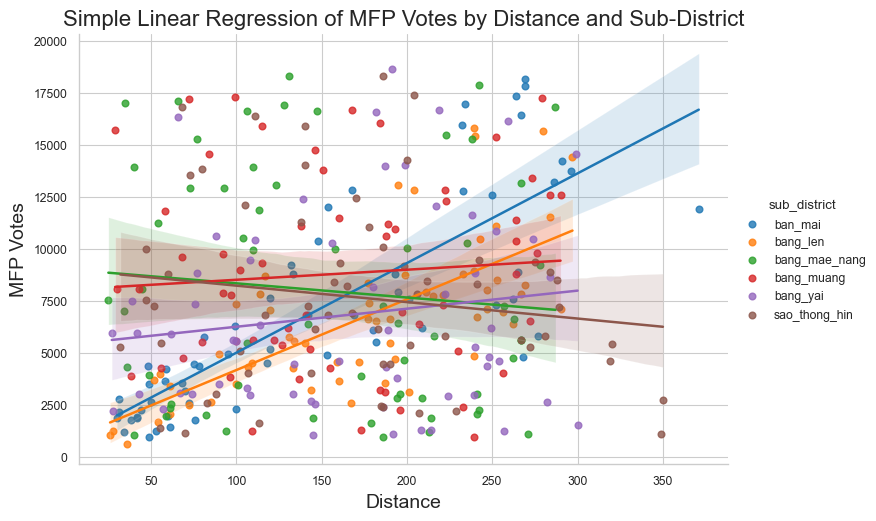

In [4]:
# Create the lmplot
lm = sns.lmplot(data=nontmfp, x="distance", y="mfp_votes", hue="sub_district", aspect=1.5)

# Customize the appearance using Matplotlib functions
lm.set_axis_labels("Distance", "MFP Votes", fontsize=14)
plt.title("Simple Linear Regression of MFP Votes by Distance and Sub-District", fontsize=16);

**Analysis of Campaign Impact:**
The data reveals intriguing insights into the impact of campaigning on Move Forward Party (MFP) votes in Nonthaburi's 6th district during the period from May 22, 2022, to May 23, 2023. Two key observations stand out:

**Sub-District Campaigning and Voter Sentiment:**
* The increased campaign activities show decreased MFP votes in districts like Saothonghin and Bang Mae Nang. These areas may have preexisting negative opinions about the MFP, thus affecting their perception of the campaign. Moreover, the circulation of campaign vehicles could cause disruptions in these areas.
* However, for the other four sub-districts, the trend is opposite. With higher campaign distances there is increased support for MFP. Remarkably, Bang Mai and Bang Len have registered the highest levels of support growth as opposed to the case of Bang Yai and Bang Muang whose support increment is lower.

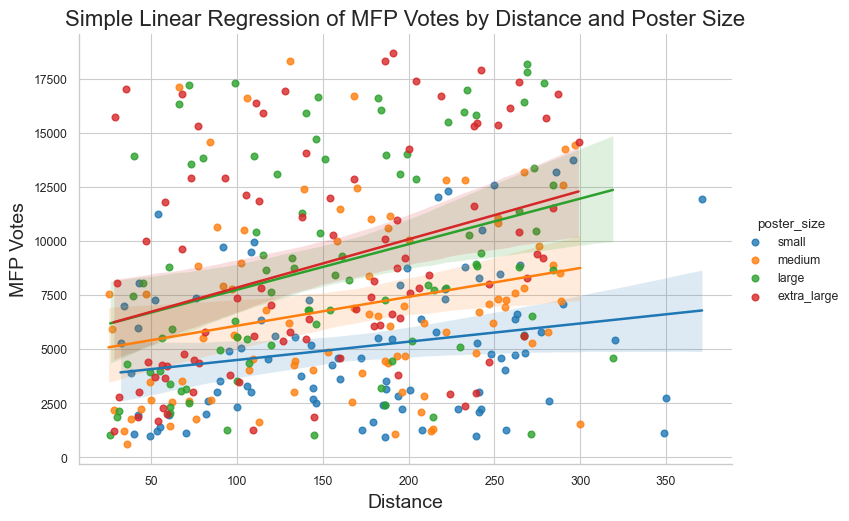

In [5]:
# Create the lmplot
lm = sns.lmplot(data=nontmfp, x="distance", y="mfp_votes", hue="poster_size", aspect=1.5)

# Customize the appearance using Matplotlib functions
lm.set_axis_labels("Distance", "MFP Votes", fontsize=14)
plt.title("Simple Linear Regression of MFP Votes by Distance and Poster Size", fontsize=16);

**Impact of Campaign Poster Size and Distance:**
* The size of campaign posters plays a significant role in vote acquisition. Larger posters correlate with higher initial vote counts and a more rapid increase in MFP votes as the campaign vehicle travels. Remarkably, both large and extra-large posters demonstrate nearly identical starting MFP vote counts at the outset of their journeys, but extra-large posters exhibit a slightly higher rate of vote gain as they cover more ground. Therefore, having larger posters appears to be an effective strategy for increasing MFP votes.

**Stage 3 - Linear Regression**
In this step, we use a linear regress model that is provided by OLS of ‘statsmodels’ package from python statistical modelling. In essence, we intend to derive a linear relationship between the said three independent variables to probable number of MFP voters

It is important to mention that the two categorical variables have been one-hot encoded for a linear regression in further steps.

In [6]:
data = nontmfp.copy()
# One-hot encoding categorical variables
data['Sub_District_Bang_Len'] = np.where(data['sub_district'] == 'bang_len', 1, 0)
data['Sub_District_Bang_Mae_Nang'] = np.where(data['sub_district'] == 'bang_mae_nang', 1, 0)
data['Sub_District_Bang_Muang'] = np.where(data['sub_district'] == 'bang_muang', 1, 0)
data['Sub_District_Bang_Yai'] = np.where(data['sub_district'] == 'bang_yai', 1, 0)
data['Sub_District_Sao_Thong_Hin'] = np.where(data['sub_district'] == 'sao_thong_hin', 1, 0)
data['Poster_Size_Medium'] = np.where(data['poster_size'] == 'medium', 1, 0)
data['Poster_Size_Large'] = np.where(data['poster_size'] == 'large', 1, 0)
data['Poster_Size_Extra_Large'] = np.where(data['poster_size'] == 'extra_large', 1, 0)

# Define independent variables
X = data[['Sub_District_Bang_Len', 'Sub_District_Bang_Mae_Nang', 'Sub_District_Bang_Muang', 'Sub_District_Bang_Yai',
          'Sub_District_Sao_Thong_Hin', 'Poster_Size_Medium', 'Poster_Size_Large', 'Poster_Size_Extra_Large', 'distance']]

# Add constant term to the model
X = sm.add_constant(X)

# Define dependent variable
y = data['mfp_votes']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              mfp_votes   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     10.95
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           4.49e-15
Time:                        09:57:04   Log-Likelihood:                -3568.3
No. Observations:                 366   AIC:                             7157.
Df Residuals:                     356   BIC:                             7196.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Analysis of Results:

* Intercept and Starting Point:
    * The intercept shows an average of 2066.07 votes for MP voting in a Ban Mai sub-district in a situation when the rest of the variables are zero. The fact that there is a non-zero intercept implies that voters favor voting for the MFP even prior to the commencement of active campaigns as long as no unnecessary travel happens at the very outset of one’s daily routine.

* Effect of Campaign Distance:
    * For every one kilometer of campaign travel, there is an average increase of 16.404 MFP votes, provided that all other factors remain constant. This highlights the positive relationship between campaign distance and MFP vote acquisition.

* Comparative Sub-District Performance:
    * When examining the data collected over 366 days, we observe differences in MFP vote counts in various sub-districts relative to Ban Mai. Specifically:
        * Bang Len has 811.391 fewer MFP votes compared to Ban Mai.
        * Bang Mae Nang surpasses Ban Mai with 792.925 more MFP votes.
        * Bang Muang records 1,529.201 more MFP votes than Ban Mai.
        * Bang Yai lags with 481.916 fewer MFP votes compared to Ban Mai.
        * Sao Thong Hin reports 242.858 more MFP votes than Ban Mai.

    `Comparatively, the differences in total voters in sub district is not statistically significant, except for Bang Muang who gave higher total voters with significant difference on average MFP voter.`

* Impact of Campaign Poster Size:
    * The choice of campaign poster size significantly affects MFP vote gains. Comparing different poster sizes to small posters:
        * Medium posters lead to 1,988.152 more MFP votes.
        * Large posters generate an additional 4,087.523 MFP votes.
        * Extra-large posters contribute to 4,225.253 more MFP votes.
        
[^simpson]

These results provide valuable insights into the factors influencing MFP vote acquisition. They highlight the importance of the campaign's starting point, campaign distance, sub-district variations, and the size of campaign posters. Understanding these dynamics can inform strategic decisions for future campaigns in the Nonthaburi 6th district.

## Conclusion and Recommendations:
Based on our study, there are various major points we are able to learn about, which in turn will provide effective suggestions for the MFP’s next campaigning moves in Nonthaburi’s 6th district.

* Optimize Campaign Distance:
    * To maximize MFP votes, it's imperative to increase campaign distance as much as possible each day throughout the district. This strategy comes with no apparent downsides except for the associated fuel costs. Extending campaign routes can substantially enhance the reach and influence of the party, making it a prudent investment.

* Addressing Sub-District Dynamics:
    * Our analysis underscores the importance of understanding and addressing sub-district variations. Although it's not statistically significant, sub-districts like Bang Mae Nang and Sao Thong Hin show a decline in MFP popularity during campaigns. To counter this trend, it's recommended to harness the support of incumbents to foster positive perceptions among non-MFP voters in these areas. Clear communication and engagement can help correct any misperceptions and boost MFP's standing.
    * Conversely, in sub-districts where MFP candidates enjoy higher favorability, it's advisable to intensify efforts. Even minimal encouragement from party members can sway voters in MFP's favor.
* Optimal Campaign Poster Size:
    * The choice of campaign poster size plays a pivotal role in securing votes. Extra-large posters are the most effective in garnering support. However, large posters also prove to be a compelling choice, as they yield only slightly fewer votes than their extra-large counterparts but can be more cost-effective. When campaigns are constrained by shorter distances, large posters emerge as a practical alternative to maximize impact.

The result, therefore, provides a well informed way forward on strategies that the sixth district of MFP can use to run its future campaigns. Through optimising campaign distance for MPF, addressing sub- district dynamics, and strategic use of sizes of posters will help boost election campaign for the party and increase it’s power in the region.

## Limitations of the Analysis:
As we analyzed the MFP voting patterns in Nonthaburi’s 6th district masking a duration extending from May 22, 2022 to May 23, 2023, numerous limitations with the method employed must be stated. The limitation are grounded on the character of data adopted and applied strategies, and it's critical to understand their implications.

* Omitted Variable Biases:
    * Our analysis relies on accessible and well-documented data points, however it's far crucial to note that several essential variables had been not included. This omission introduces the potential for omitted variable biases, wherein elements now not blanketed in the analysis may additionally impact the effects. For instance, we focused on the distance traveled all through campaigns as a key predictor. However, we did not recollect the precise locations the marketing campaign motors surpassed thru for the duration of the day. This oversight represents a sizable categorical variable, as marketing campaign routes should encompass numerous specific areas, from quiet neighborhoods to bustling markets and metropolis centers. Not accounting for those variations introduces a stage of inaccuracy into our linear regression analysis.

* Omitting Time-dependency nature of electoral campaign
    * Campaigns change over time, however, our analysis would not account for that. The number of voters might not change drastically in one day. It relies upon on preceding days' voter counts. Not thinking about this time dependency could result in overestimating the impact of marketing campaign distance on gaining MFP citizens.

In conclusion, while our analysis provides valuable insights into MFP vote acquisition, it's essential to interpret the results knowing that we left out some factors, and this could affect the analysis. Recognizing these limitations helps us understand the scope and the potential factors influencing voting patterns beyond what we looked at in this study.

[^simpson]: Simpson, E (2021), STAT0006_Friday_Week_1_Practical_Example